In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# 4. Sukurkite modelį, kuris prognozuoja “Gross domestic product per capita”. Būkite atidūs ir nenaudokite laukų, kurie tiesiogiai susiję su GDP.
# 5. Supaprastinkite 4 punkte sukurtą modelį taip, kad jis būtų kuo tikslesnis ir turėtų ne daugiau 5 kintamųjų (features).

In [47]:
# isikeliame duomenu lentele .csv formatu
duomenys = "C:\\Users\\inves\\OneDrive\\Dokumentai\\DATA learning\\PROJEKTAS\\WEOOct2022.csv"

df = pd.read_csv(duomenys)
df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,319.90","1,288.87",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,3.912,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,469.60","1,547.29",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.873,80.912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,187.419,"1,189.14","2,911.11","14,408.63","41,965.70","72,190.13","97,188.08","113,996.38","131,931.52",2019.0
8622,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,0.92,0.678,0.348,0.215,0.096,0.149,0.206,0.237,0.201,2020.0
8623,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,4.003,2.926,1.059,0.561,0.257,0.384,0.531,0.612,0.498,2019.0
8624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.reset_index()
df = df.drop([8624,8625])
df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,319.90","1,288.87",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,3.912,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,469.60","1,547.29",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.873,80.912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,698,ZWE,GGXWDG,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,174.699,"1,218.76","1,947.91","13,347.46","27,224.17","41,501.09","52,964.56","60,566.34","67,806.72",2019.0
8620,698,ZWE,GGXWDG_NGDP,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,NaN,See notes for: General government gross debt ...,NaN,...,93.213,102.491,66.913,92.635,64.872,57.489,54.497,53.13,51.395,2019.0
8621,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,187.419,"1,189.14","2,911.11","14,408.63","41,965.70","72,190.13","97,188.08","113,996.38","131,931.52",2019.0
8622,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,0.92,0.678,0.348,0.215,0.096,0.149,0.206,0.237,0.201,2020.0


In [49]:
#  pasiliekma tik stulpelius su 1980-2021 duomenimis
df = df.drop(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Subject Notes', 'Scale', 'Country/Series-specific Notes', '2022', '2023', '2024', '2025', '2026', '2027', 'Estimates Start After' ], axis=1)
df

,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,"Gross domestic product, constant prices",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,092.12","1,154.18","1,185.31","1,197.01","1,222.92","1,255.29","1,270.22","1,319.90","1,288.87",NaN
1,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.968,5.683,2.697,0.988,2.164,2.647,1.189,3.912,-2.351,NaN
2,Afghanistan,"Gross domestic product, current prices",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,033.59","1,116.83","1,183.04","1,226.57","1,222.92","1,285.46","1,327.69","1,469.60","1,547.29",NaN
3,Afghanistan,"Gross domestic product, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.293,20.17,20.616,20.057,18.02,18.883,18.401,18.876,20.136,NaN
4,Afghanistan,"Gross domestic product, current prices",Purchasing power parity; international dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.945,63.784,69.444,72.056,70.098,74.712,77.406,81.873,80.912,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,Zimbabwe,General government gross debt,National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.549,7.053,8.23,9.477,10.089,15.841,18.842,174.699,"1,218.76","1,947.91"
8620,Zimbabwe,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.263,36.94,42.204,47.458,49.081,74.075,51.001,93.213,102.491,66.913
8621,Zimbabwe,Gross domestic product corresponding to fiscal...,National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.116,19.093,19.499,19.969,20.555,21.385,36.945,187.419,"1,189.14","2,911.11"
8622,Zimbabwe,Current account balance,U.S. dollars,-0.301,-0.674,-0.748,-0.504,-0.171,-0.153,-0.051,...,-2.278,-2.649,-2.334,-1.597,-0.697,-0.271,-1.38,0.92,0.678,0.348


In [6]:
# pasiziurim turimus duomenis Subject Descriptor stulpelyje
# reiksmes = df['Subject Descriptor'].tolist()
# reiksmes

['Gross domestic product, constant prices',
 'Gross domestic product, constant prices',
 'Gross domestic product, current prices',
 'Gross domestic product, current prices',
 'Gross domestic product, current prices',
 'Gross domestic product, deflator',
 'Gross domestic product per capita, constant prices',
 'Gross domestic product per capita, constant prices',
 'Gross domestic product per capita, current prices',
 'Gross domestic product per capita, current prices',
 'Gross domestic product per capita, current prices',
 'Output gap in percent of potential GDP',
 'Gross domestic product based on purchasing-power-parity (PPP) share of world total',
 'Implied PPP conversion rate',
 'Total investment',
 'Gross national savings',
 'Inflation, average consumer prices',
 'Inflation, average consumer prices',
 'Inflation, end of period consumer prices',
 'Inflation, end of period consumer prices',
 'Volume of imports of goods and services',
 'Volume of Imports of goods',
 'Volume of exports o

In [7]:
# ieskomos_reiksmes = ['Gross domestic product per capita, constant prices', 'Gross domestic product per capita, current prices', 'U.S. dollars' ]

# df = df[df['Subject Descriptor'].isin(ieskomos_reiksmes)]
# df

,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
6,Afghanistan,"Gross domestic product per capita, constant pr...",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"42,225.02","43,169.34","42,944.60","42,110.88","41,880.72","42,265.57","40,196.70","40,990.73","39,127.08",NaN
7,Afghanistan,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2017 international do...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,513.14","2,569.34","2,555.97","2,506.35","2,492.65","2,515.55","2,392.42","2,439.68","2,328.76",NaN
8,Afghanistan,"Gross domestic product per capita, current prices",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"39,962.17","41,772.32","42,862.46","43,150.71","41,880.72","43,281.49","42,015.52","45,639.64","46,972.10",NaN
9,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,784.611,754.402,746.922,705.597,617.126,635.789,582.323,586.204,611.268,NaN
10,Afghanistan,"Gross domestic product per capita, current prices",Purchasing power parity; international dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,317.69","2,385.71","2,516.01","2,534.92","2,400.62","2,515.55","2,449.57","2,542.64","2,456.29",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8586,Zimbabwe,"Gross domestic product per capita, constant pr...",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,310.44","1,299.65","1,297.14","1,298.63","1,284.75","1,329.26","1,372.68","1,265.55","1,177.87","1,237.50"
8587,Zimbabwe,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2017 international do...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,278.82","2,260.05","2,255.69","2,258.28","2,234.14","2,311.53","2,387.04","2,200.74","2,048.27","2,151.97"
8588,Zimbabwe,"Gross domestic product per capita, current prices",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,310.44","1,421.70","1,415.28","1,425.47","1,444.72","1,481.24","2,523.25","12,573.86","78,287.87","187,906.95"
8589,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,310.44","1,421.70","1,415.28","1,425.47","1,444.72","1,481.24","2,523.25","1,542.75","1,526.16","2,121.57"


In [8]:
# df = df[df['Units'].isin(ieskomos_reiksmes)]
# df

,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
9,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,784.611,754.402,746.922,705.597,617.126,635.789,582.323,586.204,611.268,NaN
53,Albania,"Gross domestic product per capita, current prices",U.S. dollars,728.359,817.734,824.542,815.529,788.332,788.801,855.724,...,"4,248.91","4,415.60","4,584.92","3,953.61","4,124.41","4,525.89","5,257.71","5,345.06","5,268.24","6,373.30"
97,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,"2,268.61","2,305.51","2,254.33","2,316.68","2,432.72","2,753.70","2,698.92",...,"5,575.65","5,477.06","5,466.33","4,153.32","3,918.94","4,079.65","4,118.84","3,953.58","3,304.87","3,659.53"
141,Andorra,"Gross domestic product per capita, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"45,713.97","45,630.20","46,299.28","38,877.49","39,595.32","40,017.74","42,229.90","40,688.49","36,973.85","41,873.06"
185,Angola,"Gross domestic product per capita, current prices",U.S. dollars,745.119,679.02,661.52,671.804,693.779,758.525,690.446,...,"5,245.02","5,436.52","5,625.74","4,354.92","3,676.83","4,300.10","3,465.06","2,805.26","1,873.11","2,352.13"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,652.593,318.521,414.347,612.565,"1,044.41",318.956,705.99,...,"2,197.62","2,369.97","2,566.85","2,581.91","2,720.17","2,957.90","3,201.69","3,398.21","3,514.37","3,717.80"
8457,West Bank and Gaza,"Gross domestic product per capita, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,888.60","3,122.99","3,158.60","3,084.13","3,325.85","3,407.31","3,353.23","3,442.75","3,044.74","3,450.57"
8501,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,421.17","1,580.18","1,647.03","1,576.91","1,135.35",950.153,747.223,739.947,623.233,644.153
8545,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,718.795,718.743,672.013,562.441,448.532,412.851,276.151,...,"1,724.63","1,839.33","1,726.65","1,310.46","1,254.12","1,500.96","1,480.42","1,272.24",959.148,"1,095.47"


In [50]:
#  1980 stulpelyj eyra '--' reiksme ja pakeiciam 0, kitas eilutes su NaN reiksmem istrinam
df = df.replace('--', 0)
df

,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,"Gross domestic product, constant prices",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,092.12","1,154.18","1,185.31","1,197.01","1,222.92","1,255.29","1,270.22","1,319.90","1,288.87",NaN
1,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.968,5.683,2.697,0.988,2.164,2.647,1.189,3.912,-2.351,NaN
2,Afghanistan,"Gross domestic product, current prices",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,033.59","1,116.83","1,183.04","1,226.57","1,222.92","1,285.46","1,327.69","1,469.60","1,547.29",NaN
3,Afghanistan,"Gross domestic product, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.293,20.17,20.616,20.057,18.02,18.883,18.401,18.876,20.136,NaN
4,Afghanistan,"Gross domestic product, current prices",Purchasing power parity; international dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.945,63.784,69.444,72.056,70.098,74.712,77.406,81.873,80.912,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,Zimbabwe,General government gross debt,National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.549,7.053,8.23,9.477,10.089,15.841,18.842,174.699,"1,218.76","1,947.91"
8620,Zimbabwe,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.263,36.94,42.204,47.458,49.081,74.075,51.001,93.213,102.491,66.913
8621,Zimbabwe,Gross domestic product corresponding to fiscal...,National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.116,19.093,19.499,19.969,20.555,21.385,36.945,187.419,"1,189.14","2,911.11"
8622,Zimbabwe,Current account balance,U.S. dollars,-0.301,-0.674,-0.748,-0.504,-0.171,-0.153,-0.051,...,-2.278,-2.649,-2.334,-1.597,-0.697,-0.271,-1.38,0.92,0.678,0.348


In [51]:
metai = df.columns[3:]
df[metai] = df[metai].replace(',', '', regex=True)
df[metai] = df[metai].apply(pd.to_numeric, errors='coerce')
df = df.interpolate(method='linear')
df.head(60)

,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,"Gross domestic product, constant prices",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1092.120000,1154.180000,1185.3100,1197.010000,1222.920000,1255.290000,1270.220000,1319.900000,1288.870000,NaN
1,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.968000,5.683000,2.6970,0.988000,2.164000,2.647000,1.189000,3.912000,-2.351000,NaN
2,Afghanistan,"Gross domestic product, current prices",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1033.590000,1116.830000,1183.0400,1226.570000,1222.920000,1285.460000,1327.690000,1469.600000,1547.290000,NaN
3,Afghanistan,"Gross domestic product, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.293000,20.170000,20.6160,20.057000,18.020000,18.883000,18.401000,18.876000,20.136000,NaN
4,Afghanistan,"Gross domestic product, current prices",Purchasing power parity; international dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.945000,63.784000,69.4440,72.056000,70.098000,74.712000,77.406000,81.873000,80.912000,NaN
5,Afghanistan,"Gross domestic product, deflator",Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.641000,96.764000,99.8090,102.469000,100.000000,102.404000,104.525000,111.341000,120.050000,NaN
6,Afghanistan,"Gross domestic product per capita, constant pr...",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42225.020000,43169.340000,42944.6000,42110.880000,41880.720000,42265.570000,40196.700000,40990.730000,39127.080000,NaN
7,Afghanistan,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2017 international do...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2513.140000,2569.340000,2555.9700,2506.350000,2492.650000,2515.550000,2392.420000,2439.680000,2328.760000,NaN
8,Afghanistan,"Gross domestic product per capita, current prices",National currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39962.170000,41772.320000,42862.4600,43150.710000,41880.720000,43281.490000,42015.520000,45639.640000,46972.100000,NaN
9,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,784.611000,754.402000,746.9220,705.597000,617.126000,635.789000,582.323000,586.204000,611.268000,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             8624 non-null   object 
 1   Subject Descriptor  8624 non-null   object 
 2   Units               8624 non-null   object 
 3   1980                8580 non-null   float64
 4   1981                8580 non-null   float64
 5   1982                8580 non-null   float64
 6   1983                8580 non-null   float64
 7   1984                8580 non-null   float64
 8   1985                8580 non-null   float64
 9   1986                8580 non-null   float64
 10  1987                8580 non-null   float64
 11  1988                8580 non-null   float64
 12  1989                8580 non-null   float64
 13  1990                8580 non-null   float64
 14  1991                8580 non-null   float64
 15  1992                8580 non-null   float64
 16  1993  

In [55]:
# istrinam afganistano eilute, nes ji nera uzpildyta reiksmemis
# df = df.drop(9)
# df
df.reset_index
df = df.drop(df[df['Country'] == 'Afghanistan'].index)
df

,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
44,Albania,"Gross domestic product, constant prices",National currency,311.514000,329.270000,338.819000,342.546000,349.397000,344.156000,363.428000,...,700.125,707.140,719.688,735.657,760.044,788.943,820.653,837.786,808.617,877.475
45,Albania,"Gross domestic product, constant prices",Percent change,2.684000,5.700000,2.900000,1.100000,2.000000,-1.500000,5.600000,...,1.418,1.002,1.774,2.219,3.315,3.802,4.019,2.088,-3.482,8.516
46,Albania,"Gross domestic product, current prices",National currency,18.489000,19.126000,19.698000,19.900000,19.645000,20.065000,20.692000,...,1332.810,1350.050,1395.310,1434.310,1472.480,1550.650,1636.730,1691.900,1644.080,1889.840
47,Albania,"Gross domestic product, current prices",U.S. dollars,1.946000,2.229000,2.296000,2.319000,2.290000,2.339000,2.587000,...,12.324,12.784,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310
48,Albania,"Gross domestic product, current prices",Purchasing power parity; international dollars,5.759000,6.663000,7.280000,7.649000,8.083000,8.214000,8.848000,...,30.530,30.604,32.529,33.595,34.736,37.609,40.055,41.623,40.658,45.953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,Zimbabwe,General government gross debt,National currency,1.085187,0.821125,0.818375,1.062188,1.379625,1.447875,1.580062,...,6.549,7.053,8.230,9.477,10.089,15.841,18.842,174.699,1218.760,1947.910
8620,Zimbabwe,General government gross debt,Percent of GDP,0.623125,0.322750,0.296250,0.540125,0.862750,0.914250,1.036375,...,38.263,36.940,42.204,47.458,49.081,74.075,51.001,93.213,102.491,66.913
8621,Zimbabwe,Gross domestic product corresponding to fiscal...,National currency,0.161062,-0.175625,-0.225875,0.018063,0.345875,0.380625,0.492688,...,17.116,19.093,19.499,19.969,20.555,21.385,36.945,187.419,1189.140,2911.110
8622,Zimbabwe,Current account balance,U.S. dollars,-0.301000,-0.674000,-0.748000,-0.504000,-0.171000,-0.153000,-0.051000,...,-2.278,-2.649,-2.334,-1.597,-0.697,-0.271,-1.380,0.920,0.678,0.348


In [56]:
# pasitikrinam ar neliko NaN reiksmiu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 44 to 8623
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             8580 non-null   object 
 1   Subject Descriptor  8580 non-null   object 
 2   Units               8580 non-null   object 
 3   1980                8580 non-null   float64
 4   1981                8580 non-null   float64
 5   1982                8580 non-null   float64
 6   1983                8580 non-null   float64
 7   1984                8580 non-null   float64
 8   1985                8580 non-null   float64
 9   1986                8580 non-null   float64
 10  1987                8580 non-null   float64
 11  1988                8580 non-null   float64
 12  1989                8580 non-null   float64
 13  1990                8580 non-null   float64
 14  1991                8580 non-null   float64
 15  1992                8580 non-null   float64
 16  1993 

In [57]:
df = df.reset_index(drop=True)
df

,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Albania,"Gross domestic product, constant prices",National currency,311.514000,329.270000,338.819000,342.546000,349.397000,344.156000,363.428000,...,700.125,707.140,719.688,735.657,760.044,788.943,820.653,837.786,808.617,877.475
1,Albania,"Gross domestic product, constant prices",Percent change,2.684000,5.700000,2.900000,1.100000,2.000000,-1.500000,5.600000,...,1.418,1.002,1.774,2.219,3.315,3.802,4.019,2.088,-3.482,8.516
2,Albania,"Gross domestic product, current prices",National currency,18.489000,19.126000,19.698000,19.900000,19.645000,20.065000,20.692000,...,1332.810,1350.050,1395.310,1434.310,1472.480,1550.650,1636.730,1691.900,1644.080,1889.840
3,Albania,"Gross domestic product, current prices",U.S. dollars,1.946000,2.229000,2.296000,2.319000,2.290000,2.339000,2.587000,...,12.324,12.784,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310
4,Albania,"Gross domestic product, current prices",Purchasing power parity; international dollars,5.759000,6.663000,7.280000,7.649000,8.083000,8.214000,8.848000,...,30.530,30.604,32.529,33.595,34.736,37.609,40.055,41.623,40.658,45.953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,Zimbabwe,General government gross debt,National currency,1.085187,0.821125,0.818375,1.062188,1.379625,1.447875,1.580062,...,6.549,7.053,8.230,9.477,10.089,15.841,18.842,174.699,1218.760,1947.910
8576,Zimbabwe,General government gross debt,Percent of GDP,0.623125,0.322750,0.296250,0.540125,0.862750,0.914250,1.036375,...,38.263,36.940,42.204,47.458,49.081,74.075,51.001,93.213,102.491,66.913
8577,Zimbabwe,Gross domestic product corresponding to fiscal...,National currency,0.161062,-0.175625,-0.225875,0.018063,0.345875,0.380625,0.492688,...,17.116,19.093,19.499,19.969,20.555,21.385,36.945,187.419,1189.140,2911.110
8578,Zimbabwe,Current account balance,U.S. dollars,-0.301000,-0.674000,-0.748000,-0.504000,-0.171000,-0.153000,-0.051000,...,-2.278,-2.649,-2.334,-1.597,-0.697,-0.271,-1.380,0.920,0.678,0.348


In [58]:
df_test = df
df_test

,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Albania,"Gross domestic product, constant prices",National currency,311.514000,329.270000,338.819000,342.546000,349.397000,344.156000,363.428000,...,700.125,707.140,719.688,735.657,760.044,788.943,820.653,837.786,808.617,877.475
1,Albania,"Gross domestic product, constant prices",Percent change,2.684000,5.700000,2.900000,1.100000,2.000000,-1.500000,5.600000,...,1.418,1.002,1.774,2.219,3.315,3.802,4.019,2.088,-3.482,8.516
2,Albania,"Gross domestic product, current prices",National currency,18.489000,19.126000,19.698000,19.900000,19.645000,20.065000,20.692000,...,1332.810,1350.050,1395.310,1434.310,1472.480,1550.650,1636.730,1691.900,1644.080,1889.840
3,Albania,"Gross domestic product, current prices",U.S. dollars,1.946000,2.229000,2.296000,2.319000,2.290000,2.339000,2.587000,...,12.324,12.784,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310
4,Albania,"Gross domestic product, current prices",Purchasing power parity; international dollars,5.759000,6.663000,7.280000,7.649000,8.083000,8.214000,8.848000,...,30.530,30.604,32.529,33.595,34.736,37.609,40.055,41.623,40.658,45.953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,Zimbabwe,General government gross debt,National currency,1.085187,0.821125,0.818375,1.062188,1.379625,1.447875,1.580062,...,6.549,7.053,8.230,9.477,10.089,15.841,18.842,174.699,1218.760,1947.910
8576,Zimbabwe,General government gross debt,Percent of GDP,0.623125,0.322750,0.296250,0.540125,0.862750,0.914250,1.036375,...,38.263,36.940,42.204,47.458,49.081,74.075,51.001,93.213,102.491,66.913
8577,Zimbabwe,Gross domestic product corresponding to fiscal...,National currency,0.161062,-0.175625,-0.225875,0.018063,0.345875,0.380625,0.492688,...,17.116,19.093,19.499,19.969,20.555,21.385,36.945,187.419,1189.140,2911.110
8578,Zimbabwe,Current account balance,U.S. dollars,-0.301000,-0.674000,-0.748000,-0.504000,-0.171000,-0.153000,-0.051000,...,-2.278,-2.649,-2.334,-1.597,-0.697,-0.271,-1.380,0.920,0.678,0.348


In [59]:
numeric_columns = df.select_dtypes(include='number')
categorical_column = pd.get_dummies(df['Subject Descriptor'])
combined_df = pd.concat([numeric_columns, categorical_column], axis=1)
correlation_matrix = combined_df.corr()

correlation_matrix

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,"Inflation, average consumer prices","Inflation, end of period consumer prices",Output gap in percent of potential GDP,Population,Total investment,Unemployment rate,Volume of Imports of goods,Volume of exports of goods,Volume of exports of goods and services,Volume of imports of goods and services
1980,1.000000,0.999445,0.999233,0.999081,0.999642,0.999013,0.997460,0.995303,0.993851,0.972554,...,-0.004612,-0.004608,-0.003044,-0.003210,-0.003226,-0.003214,-0.003218,-0.003216,-0.003217,-0.003219
1981,0.999445,1.000000,0.998118,0.997497,0.999178,0.999022,0.998577,0.996984,0.996247,0.974512,...,-0.004888,-0.004884,-0.003212,-0.003401,-0.003419,-0.003405,-0.003410,-0.003407,-0.003409,-0.003412
1982,0.999233,0.998118,1.000000,0.999790,0.998884,0.997337,0.995294,0.992208,0.991772,0.972411,...,-0.004481,-0.004478,-0.002958,-0.003120,-0.003134,-0.003124,-0.003128,-0.003125,-0.003127,-0.003129
1983,0.999081,0.997497,0.999790,1.000000,0.999001,0.997541,0.995113,0.992079,0.990959,0.971264,...,-0.004404,-0.004400,-0.002915,-0.003066,-0.003081,-0.003070,-0.003074,-0.003071,-0.003073,-0.003075
1984,0.999642,0.999178,0.998884,0.999001,1.000000,0.999653,0.998454,0.996604,0.995198,0.973693,...,-0.004753,-0.004748,-0.003133,-0.003307,-0.003326,-0.003312,-0.003317,-0.003314,-0.003316,-0.003319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unemployment rate,-0.003214,-0.003405,-0.003124,-0.003070,-0.003312,-0.003420,-0.003689,-0.003822,-0.004042,-0.004330,...,-0.033278,-0.033278,-0.023256,-0.023256,-0.023256,1.000000,-0.023256,-0.023256,-0.023256,-0.023256
Volume of Imports of goods,-0.003218,-0.003410,-0.003128,-0.003074,-0.003317,-0.003425,-0.003695,-0.003828,-0.004048,-0.004335,...,-0.033278,-0.033278,-0.023256,-0.023256,-0.023256,-0.023256,1.000000,-0.023256,-0.023256,-0.023256
Volume of exports of goods,-0.003216,-0.003407,-0.003125,-0.003071,-0.003314,-0.003421,-0.003691,-0.003824,-0.004044,-0.004332,...,-0.033278,-0.033278,-0.023256,-0.023256,-0.023256,-0.023256,-0.023256,1.000000,-0.023256,-0.023256
Volume of exports of goods and services,-0.003217,-0.003409,-0.003127,-0.003073,-0.003316,-0.003423,-0.003693,-0.003826,-0.004046,-0.004333,...,-0.033278,-0.033278,-0.023256,-0.023256,-0.023256,-0.023256,-0.023256,-0.023256,1.000000,-0.023256


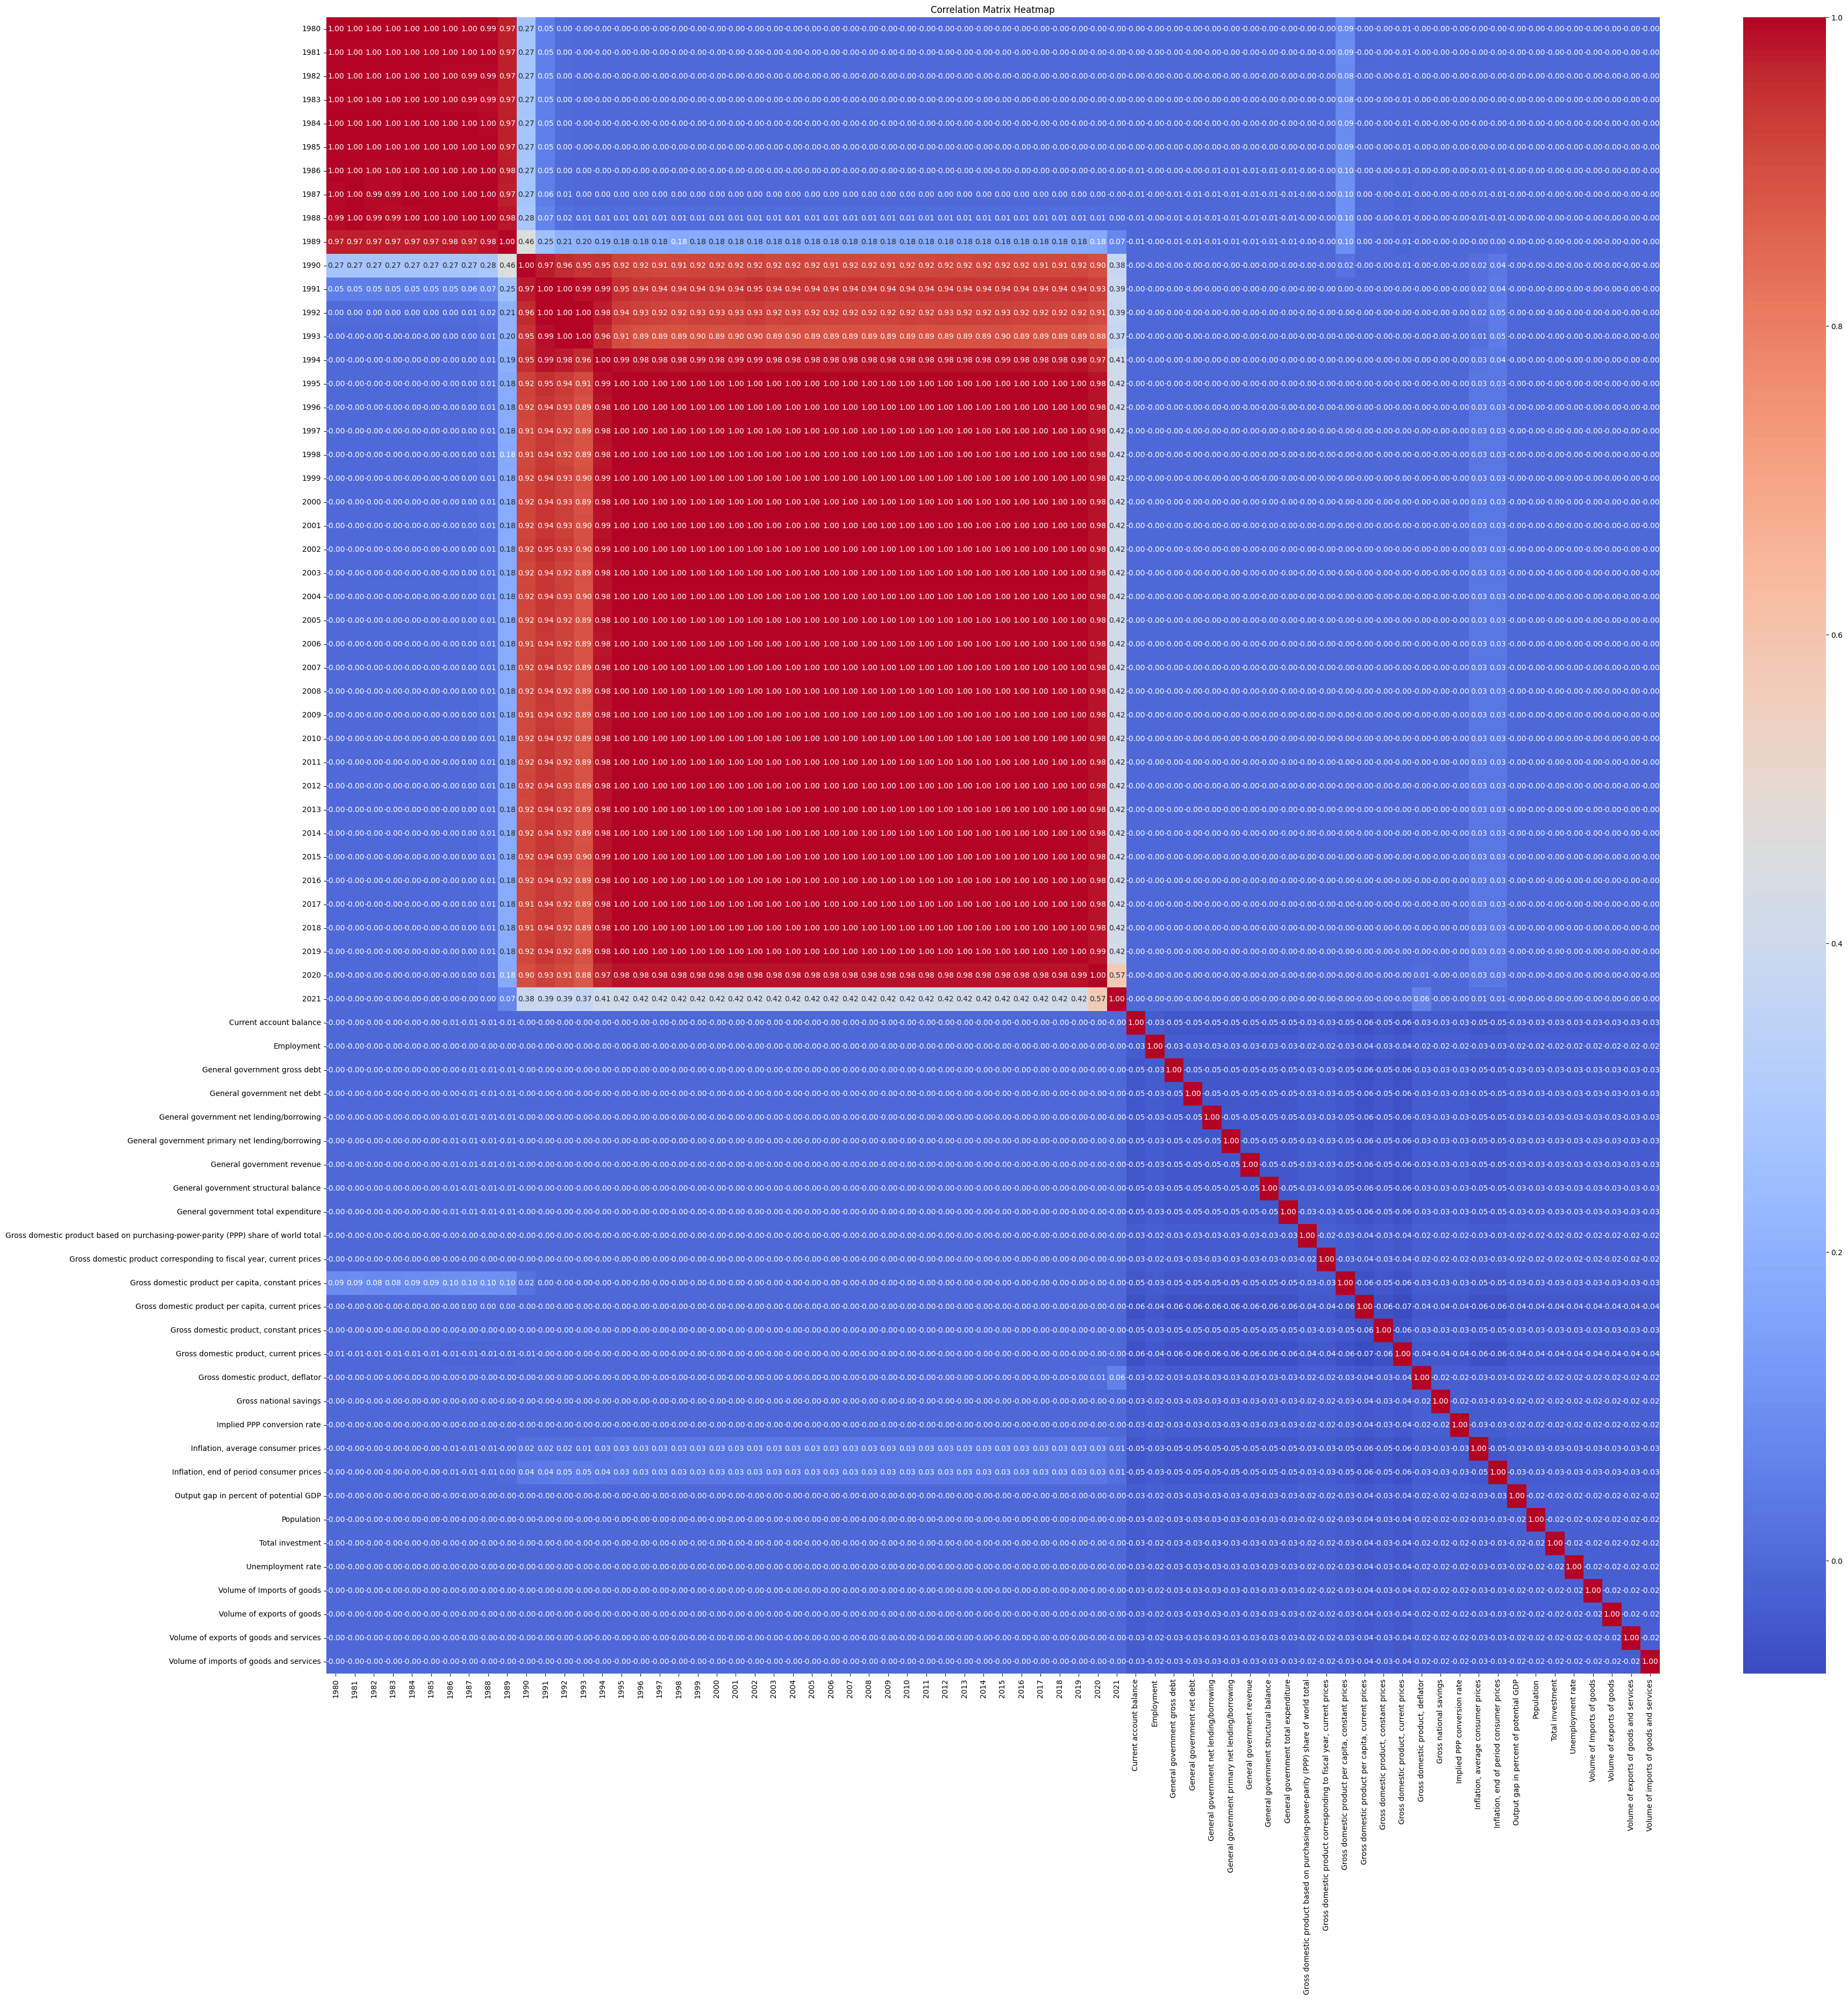

In [62]:
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [68]:
# Linear regression modelis

years_columns = df.columns[4:]

regression_results = {}

for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    
    years = []
    targets = []
    
    for year_column in years_columns:
        year = int(year_column)
        value = country_df[year_column].values[0]
        
        if pd.notnull(value):  # Exclude NaN values
            years.append(year)
            targets.append(value)
    
    model = LinearRegression()
    model.fit(pd.DataFrame(years), pd.DataFrame(targets))
    
    regression_results[country] = {
        'coefficient': model.coef_[0][0],
        'intercept': model.intercept_[0]
    }

for country, result in regression_results.items():
    print(f"Country: {country}")
    print(f"Coefficient: {result['coefficient']}")
    print(f"Intercept: {result['intercept']}")
    print()


Country: Albania
Coefficient: 14.946773693379795
Intercept: -29409.66335557492

Country: Algeria
Coefficient: 129.46158885017425
Intercept: -254241.6656306621

Country: Andorra
Coefficient: -0.11734120015485876
Intercept: 239.52343202477752

Country: Angola
Coefficient: 42.88470331010454
Intercept: -85007.12651864113

Country: Antigua and Barbuda
Coefficient: 0.06103414634146344
Intercept: -119.80966829268297

Country: Argentina
Coefficient: 11.676591289198608
Intercept: -22855.11107212544

Country: Armenia
Coefficient: 115.10817920226029
Intercept: -228609.9054499632

Country: Aruba
Coefficient: -5.021501403515641
Intercept: 10091.92735200838

Country: Australia
Coefficient: 37.73540209059235
Intercept: -74251.05043693383

Country: Austria
Coefficient: 5.206645470383275
Intercept: -10141.158439895471

Country: Azerbaijan
Coefficient: 0.9471829307007359
Intercept: -1882.3157576113053

Country: The Bahamas
Coefficient: 0.13121445993031358
Intercept: -253.63676846689896

Country: Bahrain

In [75]:
#  Random forest

X = df.drop(['Country', 'Subject Descriptor', 'Units'], axis=1)
y = df['1990']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=50, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 880201684.5296255
R-squared: 0.9733564512892872


In [77]:
# Gradient boosting regressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 404441539.32960206
R-squared: 0.9877576264131754
